# 对死刑数据的机器学习预测

In [2]:
# 加载基本库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
#读取数据
df = pd.read_csv('../data/all_encoded.csv')
df.head()

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed
0,1,4,49,1,1977,1,17,1
1,1,2,12,1,1979,5,25,1
2,1,3,32,1,1979,10,22,1
3,1,2,18,1,1981,3,9,1
4,1,2,51,1,1982,8,10,1


In [4]:
# 将Year, Month, Day合并为Date列，并转换为datetime格式
df['Date'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.head()

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed,Date
0,1,4,49,1,1977,1,17,1,1977-01-17
1,1,2,12,1,1979,5,25,1,1979-05-25
2,1,3,32,1,1979,10,22,1,1979-10-22
3,1,2,18,1,1981,3,9,1,1981-03-09
4,1,2,51,1,1982,8,10,1,1982-08-10


In [5]:
# 查看Date列中的缺失数据数量
missing_dates = df['Date'].isna().sum()
print(f"Date列中缺失的数据数量: {missing_dates}")
# 删除Date列中缺失数据的行
df = df.dropna(subset=['Date'])
print(f"删除缺失Date后的数据量: {len(df)}")


Date列中缺失的数据数量: 38
删除缺失Date后的数据量: 13737


模型准确率: 0.576783114992722

分类报告:
               precision    recall  f1-score   support

           1       0.73      0.72      0.72      1752
           2       0.22      0.22      0.22       159
           3       0.00      0.00      0.00         1
           4       0.48      0.39      0.43        36
           5       0.20      0.50      0.29         2
           6       0.57      0.60      0.59        20
           7       0.75      0.86      0.80         7
           8       0.80      0.83      0.82        24
           9       0.88      1.00      0.93         7
          10       0.38      0.36      0.37       479
          11       0.03      0.04      0.04        73
          12       0.89      0.94      0.91        17
          13       0.20      1.00      0.33         2
          14       0.75      0.75      0.75         4
          15       0.25      0.25      0.25        16
          16       0.38      0.50      0.43        12
          17       0.00      0.00      0.00     

/opt/anaconda3/envs/machine_learning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/machine_learning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/machine_learning/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

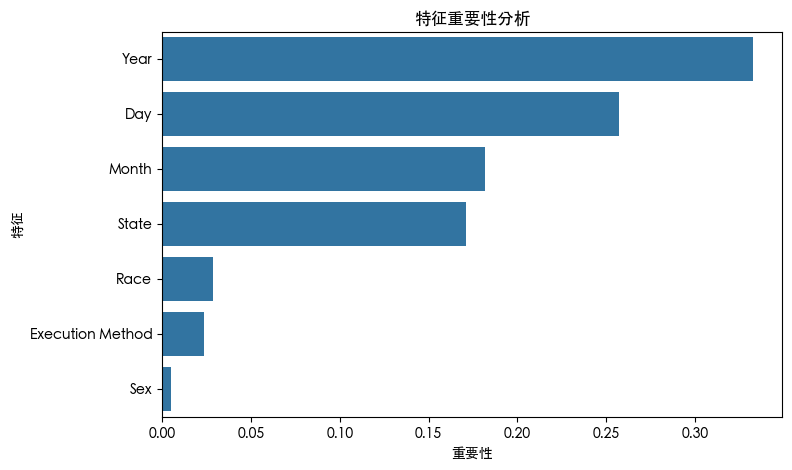

In [6]:
# 决策树预测Crimes Committed（0或1）

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
plt.rcParams['font.family'] = 'Heiti TC'  # 替换为你选择的字体
# 1. 选择特征和目标
features = ['Race', 'Execution Method', 'State', 'Sex', 'Year', 'Month', 'Day']
X = df[features]

y = df['Crimes Committed']

# 2. 处理缺失值（如有）
X = X.fillna(X.mean())

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 建立决策树模型并训练
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 5. 预测与评估
y_pred = dt_model.predict(X_test)
print("模型准确率:", accuracy_score(y_test, y_pred))
print("\n分类报告:\n", classification_report(y_test, y_pred))

# 6. 特征重要性可视化
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    '特征': features,
    '重要性': dt_model.feature_importances_
}).sort_values('重要性', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='重要性', y='特征', data=feature_importance)
plt.title('特征重要性分析')
plt.show()

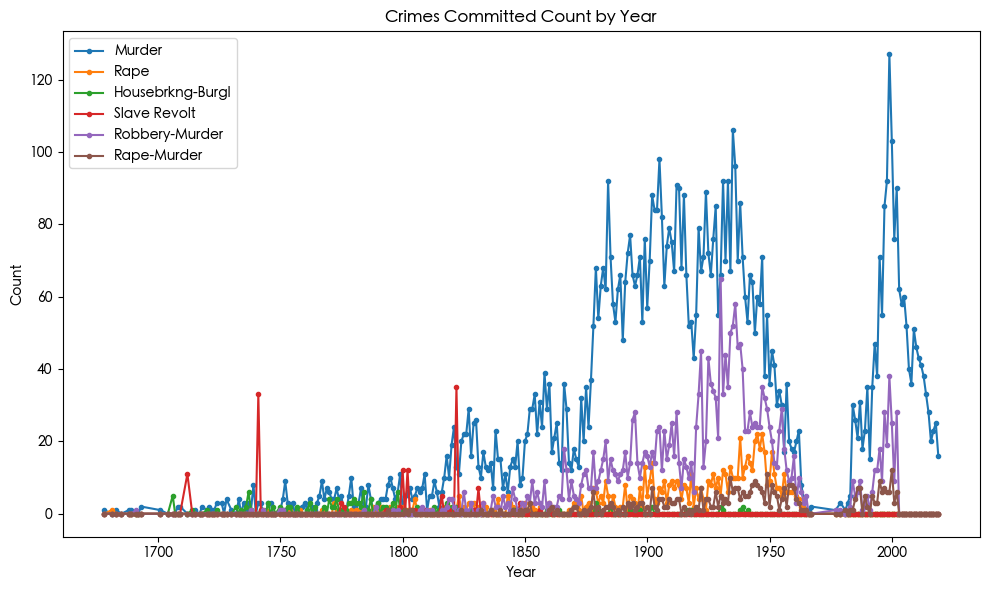

In [19]:
# 确保Date列为datetime类型
df['Date'] = pd.to_datetime(df['Date'])

# 按年份统计每年不同Crimes Committed的数量
df['Year'] = df['Date'].dt.year
crime_counts = df.groupby(['Year', 'Crimes Committed']).size().unstack(fill_value=0)

# 绘制曲线
plt.figure(figsize=(10, 6))
for crime_type in crime_counts.columns:
    if crime_counts[crime_type].sum() > 100:
        if crime_type == 1:
            crime_label = 'Murder'
        elif crime_type == 2:
            crime_label = 'Rape'
        elif crime_type == 4:
            crime_label = 'Housebrkng-Burgl'
        elif crime_type == 8:
            crime_label = 'Slave Revolt'
        elif crime_type == 10:
            crime_label = 'Robbery-Murder'
        elif crime_type == 11:
            crime_label = 'Rape-Murder'
        elif crime_type == 23:
            continue
        plt.plot(crime_counts.index, crime_counts[crime_type], marker='o', markersize=3, label=f'{crime_label}')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crimes Committed Count by Year')
plt.legend()
plt.tight_layout()
plt.savefig('../visualize/crimes_committed_count_by_year.png', dpi=600)
plt.show()


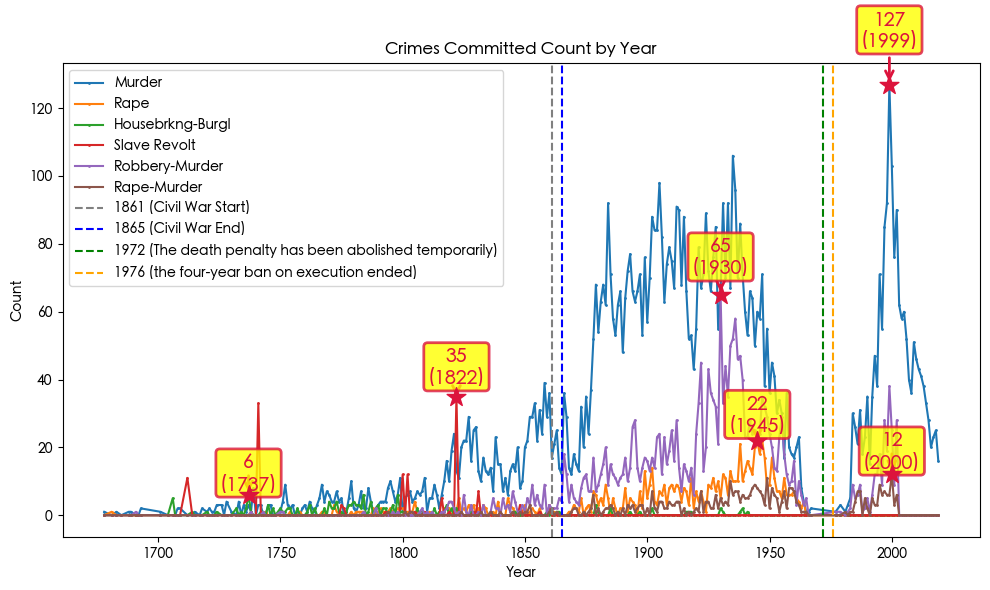

In [18]:
# 确保Date列为datetime类型
df['Date'] = pd.to_datetime(df['Date'])

# 按年份统计每年不同Crimes Committed的数量
df['Year'] = df['Date'].dt.year
crime_counts = df.groupby(['Year', 'Crimes Committed']).size().unstack(fill_value=0)

# 绘制曲线
plt.figure(figsize=(10, 6))
for crime_type in crime_counts.columns:
    if crime_counts[crime_type].sum() > 100:
        if crime_type == 1:
            crime_label = 'Murder'
        elif crime_type == 2:
            crime_label = 'Rape'
        elif crime_type == 4:
            crime_label = 'Housebrkng-Burgl'
        elif crime_type == 8:
            crime_label = 'Slave Revolt'
        elif crime_type == 10:
            crime_label = 'Robbery-Murder'
        elif crime_type == 11:
            crime_label = 'Rape-Murder'
        elif crime_type == 23:
            continue
        plt.plot(crime_counts.index, crime_counts[crime_type], marker='o', markersize=1, label=f'{crime_label}')
        # 找到最高点
        ymax = crime_counts[crime_type].max()
        xmax = crime_counts[crime_type].idxmax()
        # 用五角星标记最高点
        plt.scatter(xmax, ymax, color='crimson', marker='*', s=200, zorder=5)
        # 标注最高点
        plt.annotate(
            f'{ymax}\n({xmax})',
            xy=(xmax, ymax),
            xytext=(xmax, ymax + ymax * 0.08),
            arrowprops=dict(facecolor='crimson', edgecolor='crimson', arrowstyle='->', lw=2),
            ha='center',
            va='bottom',
            color='crimson',
            fontsize=14,
            fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', ec='crimson', lw=2, alpha=0.8)
        )
# 添加垂直线
plt.axvline(x=1861, color='gray', linestyle='--', linewidth=1.5, label='1861 (Civil War Start)')
plt.axvline(x=1865, color='blue', linestyle='--', linewidth=1.5, label='1865 (Civil War End)')
plt.axvline(x=1972, color='green', linestyle='--', linewidth=1.5, label='1972 (The death penalty has been abolished temporarily)')
plt.axvline(x=1976, color='orange', linestyle='--', linewidth=1.5, label='1976 (the four-year ban on execution ended)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crimes Committed Count by Year')
plt.legend()
plt.tight_layout()
plt.savefig('../visualize/crimes_committed_count_by_year_with_highlights.png', dpi=600)
plt.show()

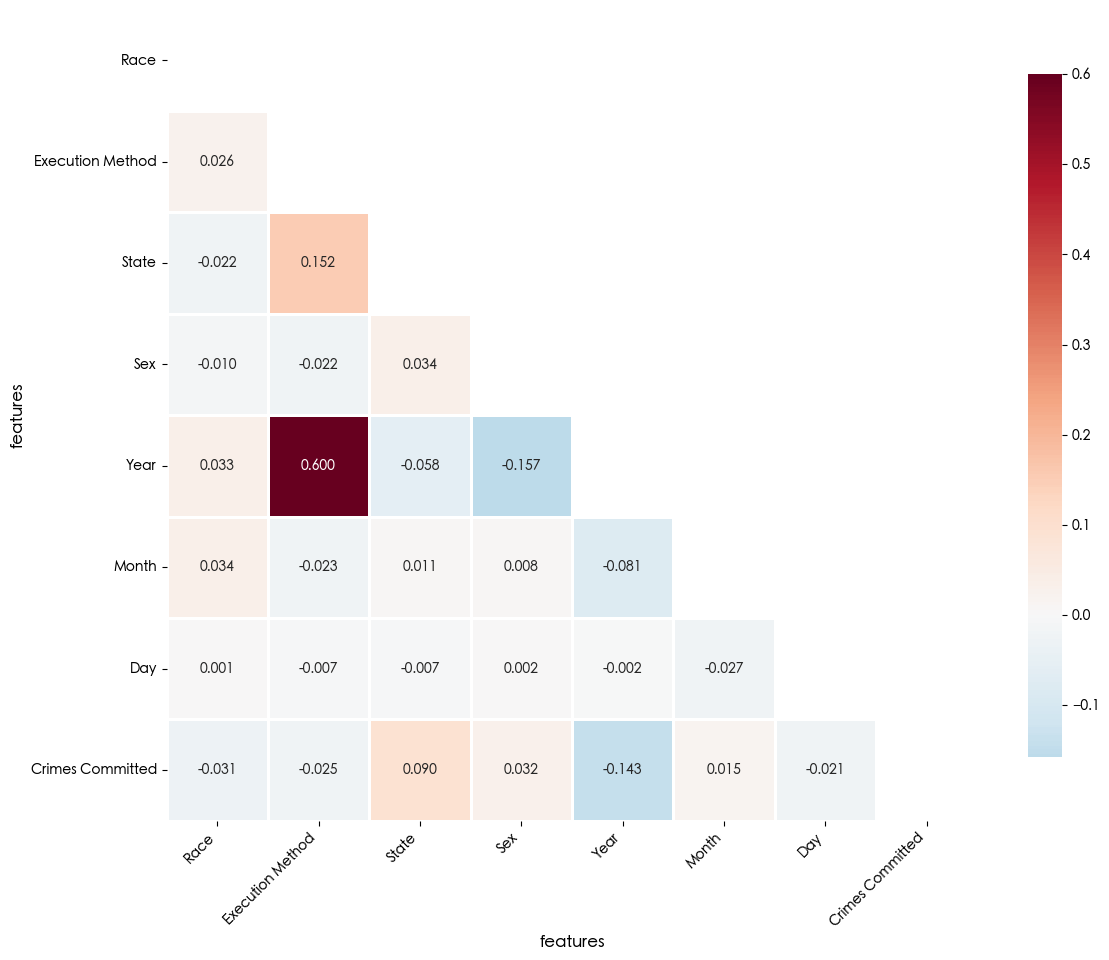

In [26]:
# 创建数值特征的相关性热力图（美化版）
plt.figure(figsize=(12, 10))

# 创建相关性矩阵
correlation_matrix = df[['Race', 'Execution Method', 'State', 'Sex', 'Year', 'Month', 'Day', 'Crimes Committed']].corr()

# 创建mask用于只显示下三角
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 设置阈值，突出显示高相关性
high_corr_threshold = 0.3
abs_corr = np.abs(correlation_matrix)

# 绘制热力图
ax = sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                linewidths=1, 
                cbar_kws={"shrink": .8},
                fmt='.3f',
                annot_kws={'size': 10, 'weight': 'bold'})


plt.xlabel('features', fontsize=12, fontweight='bold')
plt.ylabel('features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)


plt.tight_layout()
plt.savefig('../visualize/correlation_heatmap_enhanced.png', dpi=600, bbox_inches='tight')
plt.show()



In [27]:
set(df['Race'])

{1, 2, 3, 4, 5, 6}

In [71]:
df['murder'] = (df['Crimes Committed'] == 1).astype(int)
df['rape'] = (df['Crimes Committed'] == 2).astype(int)
df['Housebrkng-Burgl'] = (df['Crimes Committed'] == 4).astype(int)
df['Treason'] = (df['Crimes Committed'] == 7).astype(int)
df['Slave Revolt'] = (df['Crimes Committed'] == 8).astype(int)
df['Robbery-Murder'] = (df['Crimes Committed'] == 10).astype(int)
df['Rape-Murder'] = (df['Crimes Committed'] == 11).astype(int)
df['Horse Stealing'] = (df['Crimes Committed'] == 5).astype(int)

df['White'] = (df['Race'] == 1).astype(int)
df['Black'] = (df['Race'] == 2).astype(int)
df['Native American'] = (df['Race'] == 3).astype(int)
df['Asian'] = (df['Race'] == 4).astype(int)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

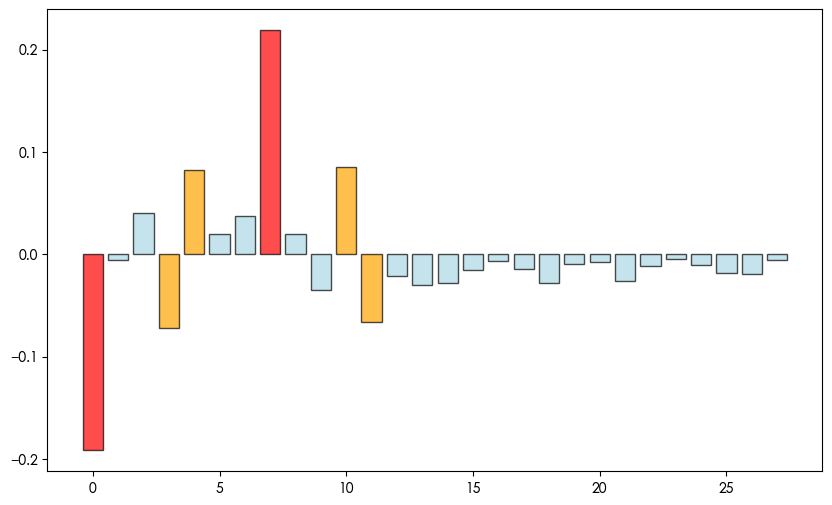

In [84]:
# 计算每个Race值与Crimes Committed的相关性
race_crime_correlations = []
race_values = ['White', 'Black', 'Native American', 'Asian']
crime_values = ['rape', 'Housebrkng-Burgl', 'Treason', 'Slave Revolt', 'Robbery-Murder', 'Rape-Murder', 'Horse Stealing']
for crime in crime_values:
    # 创建二进制变量：当前race为1，其他为0
    cr_df = df[df[crime]==1]
    race_binary = cr_df[race_values + [crime]]
    # 计算与Crimes Committed的相关性
    corr = race_binary.corr()
    corr = corr.loc[race_values, crime]
    race_crime_correlations.append(corr)

# 绘制直方图
plt.figure(figsize=(10, 6))
# Calculate correlations between each race and each crime type
correlations_data = []
colors = []

for race in race_values:
    for crime in crime_values:
        # Calculate correlation between race and crime across the full dataset
        corr = df[race].corr(df[crime])
        correlations_data.append(corr)
        
        # Assign colors based on correlation magnitude
        if pd.isna(corr):
            colors.append('grey')
        elif abs(corr) >= 0.1:
            colors.append('red')
        elif abs(corr) >= 0.05:
            colors.append('orange')
        else:
            colors.append('lightblue')

# Create labels for x-axis (Race-Crime combinations)
x_labels = [f"{race}\n{crime}" for race in race_values for crime in crime_values]

bars = plt.bar(range(len(correlations_data)), correlations_data, 
               color=colors, alpha=0.7, edgecolor='black', linewidth=1)

# 添加数值标签
for crime, corr, bar in zip(crime_values, race_crime_correlations, bars):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + (0.002 if corr >= 0 else -0.005), 
             f'{corr:.4f}', ha='center', 
             va='bottom' if corr >= 0 else 'top', 
             fontweight='bold', fontsize=10)

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Race', fontweight='bold', fontsize=12)
plt.ylabel('Correlation with Crimes Committed', fontweight='bold', fontsize=12)
plt.title('Correlation between Each Race Value and Crimes Committed', fontweight='bold', fontsize=14)
plt.grid(axis='y', alpha=0.3)
# 添加图例
legend_elements = [Patch(facecolor='red', label='|corr| ≥ 0.1'),
                   Patch(facecolor='orange', label='0.05 ≤ |corr| < 0.1'),
                   Patch(facecolor='lightblue', label='|corr| < 0.05')]
plt.legend(handles=legend_elements, loc='upper right')
# 设置x轴刻度
plt.xticks(race_values)

plt.tight_layout()
plt.savefig('../visualize/race_crimes_correlation_histogram.png', dpi=600, bbox_inches='tight')
plt.show()

# 打印相关性数值
print("各Race值与Crimes Committed的相关性:")
for race, corr in zip(race_values, race_crime_correlations):
    print(f"Race {race}: {corr:.4f}")

In [81]:
race_crime_correlations

[                    White     Black  Native American  Asian  rape
 White            1.000000 -0.935471        -0.022038    NaN   NaN
 Black           -0.935471  1.000000        -0.214113    NaN   NaN
 Native American -0.022038 -0.214113         1.000000    NaN   NaN
 Asian                 NaN       NaN              NaN    NaN   NaN
 rape                  NaN       NaN              NaN    NaN   NaN,
                   White  Black  Native American  Asian  Housebrkng-Burgl
 White               1.0   -1.0              NaN    NaN               NaN
 Black              -1.0    1.0              NaN    NaN               NaN
 Native American     NaN    NaN              NaN    NaN               NaN
 Asian               NaN    NaN              NaN    NaN               NaN
 Housebrkng-Burgl    NaN    NaN              NaN    NaN               NaN,
                  White  Black  Native American  Asian  Treason
 White              1.0   -1.0              NaN    NaN      NaN
 Black             -1.0 

Generating plot for crime: rape


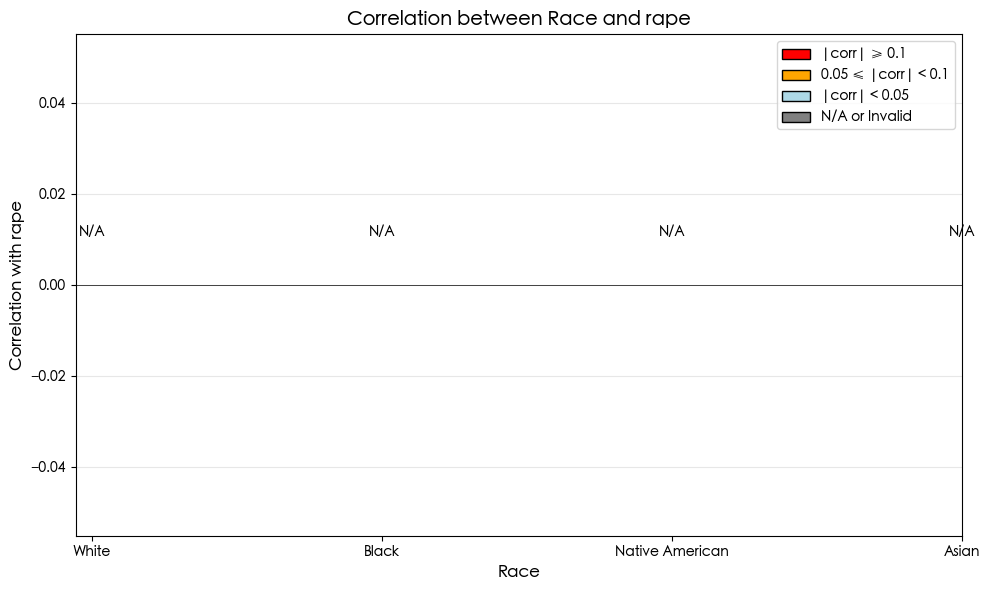


Correlations between Race and rape:
Race White: N/A
Race Black: N/A
Race Native American: N/A
Race Asian: N/A


In [80]:
# 计算每个Race值与Crimes Committed的相关性
race_crime_correlations = []
race_values = ['White', 'Black', 'Native American', 'Asian']
crime_values = ['rape', 'Housebrkng-Burgl', 'Treason', 'Slave Revolt', 'Robbery-Murder', 'Rape-Murder', 'Horse Stealing']
for crime in crime_values:
    # 创建二进制变量：当前race为1，其他为0
    # IMPORTANT: The line below will likely lead to NaN correlations if 'crime' column becomes all 1s.
    # For meaningful correlation of races with a specific crime, you should use the full df or df filtered differently.
    # cr_df = df[df[crime]==1] 
    # Assuming for this exercise that race_binary.corr() produces a DataFrame, even if potentially with NaNs.
    # A more standard approach for cr_df would be cr_df = df.copy() if you want to correlate general race columns with crime columns.
    
    # Let's proceed assuming race_binary.corr() is intended to be calculated on a subset or full df.
    # For the purpose of this fix, we assume race_crime_correlations is populated as per user's original logic.
    # If cr_df = df[df[crime]==1], then race_binary[crime] will be all 1s, and corr with it will be NaN.
    # We will handle NaNs in the plotting.
    cr_df = df[df[crime]==1].copy() # Using .copy() to avoid SettingWithCopyWarning if df was a slice
    if cr_df.empty: # If no instances of this crime, corr matrix would be problematic
        # Append a placeholder or handle appropriately
        # For simplicity, let's append an empty DataFrame or a matrix of NaNs
        # This depends on how robust the downstream code needs to be.
        # Here, we'll let .corr() handle it, which might result in NaNs.
        pass # Allow .corr() to be called on potentially empty or problematic df
        
    race_binary_cols = race_values + [crime]
    # Ensure all columns exist in cr_df before selecting
    valid_cols = [col for col in race_binary_cols if col in cr_df.columns]
    if len(valid_cols) < 2 : # Need at least 2 columns to correlate
        # Create a NaN matrix of appropriate size if not enough columns
        num_expected_cols = len(race_values) + 1
        nan_matrix = pd.DataFrame(np.nan, index=race_values + [crime], columns=race_values + [crime])
        corr_matrix = nan_matrix
    else:
        race_binary = cr_df[valid_cols]
        corr_matrix = race_binary.corr()
    race_crime_correlations.append(corr_matrix)

# --- MODIFIED PLOTTING SECTION ---
from matplotlib.patches import Patch # Make sure Patch is imported

# Choose a specific crime to plot from the crime_values list
# You can change chosen_crime_index to plot for a different crime,
# or loop this whole plotting block for each crime.
if not crime_values:
    print("Warning: crime_values is empty. Cannot generate plot.")
elif not race_crime_correlations or len(race_crime_correlations) != len(crime_values):
    print("Warning: race_crime_correlations is empty or mismatched with crime_values. Cannot generate plot.")
else:
    chosen_crime_index = 0 # Example: plot for the first crime
    chosen_crime_name = crime_values[chosen_crime_index]
    
    print(f"Generating plot for crime: {chosen_crime_name}")

    # Get the correlation matrix for the chosen crime
    corr_matrix_for_chosen_crime = race_crime_correlations[chosen_crime_index]

    scalar_correlations_to_plot = []
    for race_name in race_values:
        try:
            # Ensure the matrix is a DataFrame and keys exist
            if isinstance(corr_matrix_for_chosen_crime, pd.DataFrame) and \
               race_name in corr_matrix_for_chosen_crime.index and \
               chosen_crime_name in corr_matrix_for_chosen_crime.columns:
                correlation_value = corr_matrix_for_chosen_crime.loc[race_name, chosen_crime_name]
                scalar_correlations_to_plot.append(correlation_value)
            else:
                scalar_correlations_to_plot.append(np.nan)
        except Exception as e:
            # print(f"Error extracting correlation for Race '{race_name}' and Crime '{chosen_crime_name}': {e}")
            scalar_correlations_to_plot.append(np.nan)

    plt.figure(figsize=(10, 6))

    def get_color_for_corr(c_val):
        if pd.isna(c_val):
            return 'grey' 
        abs_c = abs(c_val)
        if abs_c >= 0.1:
            return 'red'
        elif abs_c >= 0.05:
            return 'orange'
        else:
            return 'lightblue'

    bar_colors = [get_color_for_corr(c) for c in scalar_correlations_to_plot]

    bars = plt.bar(race_values, scalar_correlations_to_plot,
                   color=bar_colors,
                   alpha=0.7, edgecolor='black', linewidth=1)

    for i, bar_obj in enumerate(bars):
        corr_scalar = scalar_correlations_to_plot[i]
        bar_height = bar_obj.get_height() # Actual height of the bar drawn

        if pd.isna(corr_scalar):
            label_text = "N/A"
            # Position text slightly above zero for N/A if bar height is 0 or NaN
            y_pos = 0.01 if (pd.isna(bar_height) or bar_height == 0) else bar_height + 0.002 
            va_align = 'bottom'
        else:
            label_text = f'{corr_scalar:.4f}'
            if corr_scalar >= 0:
                y_pos = bar_height + 0.002 
                va_align = 'bottom'
            else:
                y_pos = bar_height - 0.005
                va_align = 'top'
        
        # Ensure y_pos is a number for plt.text
        if pd.isna(y_pos): y_pos = 0 # Default if somehow y_pos is NaN

        plt.text(bar_obj.get_x() + bar_obj.get_width()/2,
                 y_pos,
                 label_text, ha='center',
                 va=va_align,
                 fontweight='bold', fontsize=10)

    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    plt.xlabel('Race', fontweight='bold', fontsize=12)
    plt.ylabel(f'Correlation with {chosen_crime_name}', fontweight='bold', fontsize=12)
    plt.title(f'Correlation between Race and {chosen_crime_name}', fontweight='bold', fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    
    legend_elements = [
        Patch(facecolor='red', edgecolor='black', label='|corr| ≥ 0.1'),
        Patch(facecolor='orange', edgecolor='black', label='0.05 ≤ |corr| < 0.1'),
        Patch(facecolor='lightblue', edgecolor='black', label='|corr| < 0.05'),
        Patch(facecolor='grey', edgecolor='black', label='N/A or Invalid')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    plt.xticks(race_values)
    plt.tight_layout()
    plt.savefig(f'../visualize/correlation_race_vs_{chosen_crime_name}.png', dpi=600)
    plt.show()

    print(f"\nCorrelations between Race and {chosen_crime_name}:")
    for race_label, corr_val in zip(race_values, scalar_correlations_to_plot):
        if pd.isna(corr_val):
            print(f"Race {race_label}: N/A")
        else:
            print(f"Race {race_label}: {corr_val:.4f}")

# The original print loop after the plot is removed as its logic was also based on the previous structure.
# A new print statement specific to the plotted data is included above.


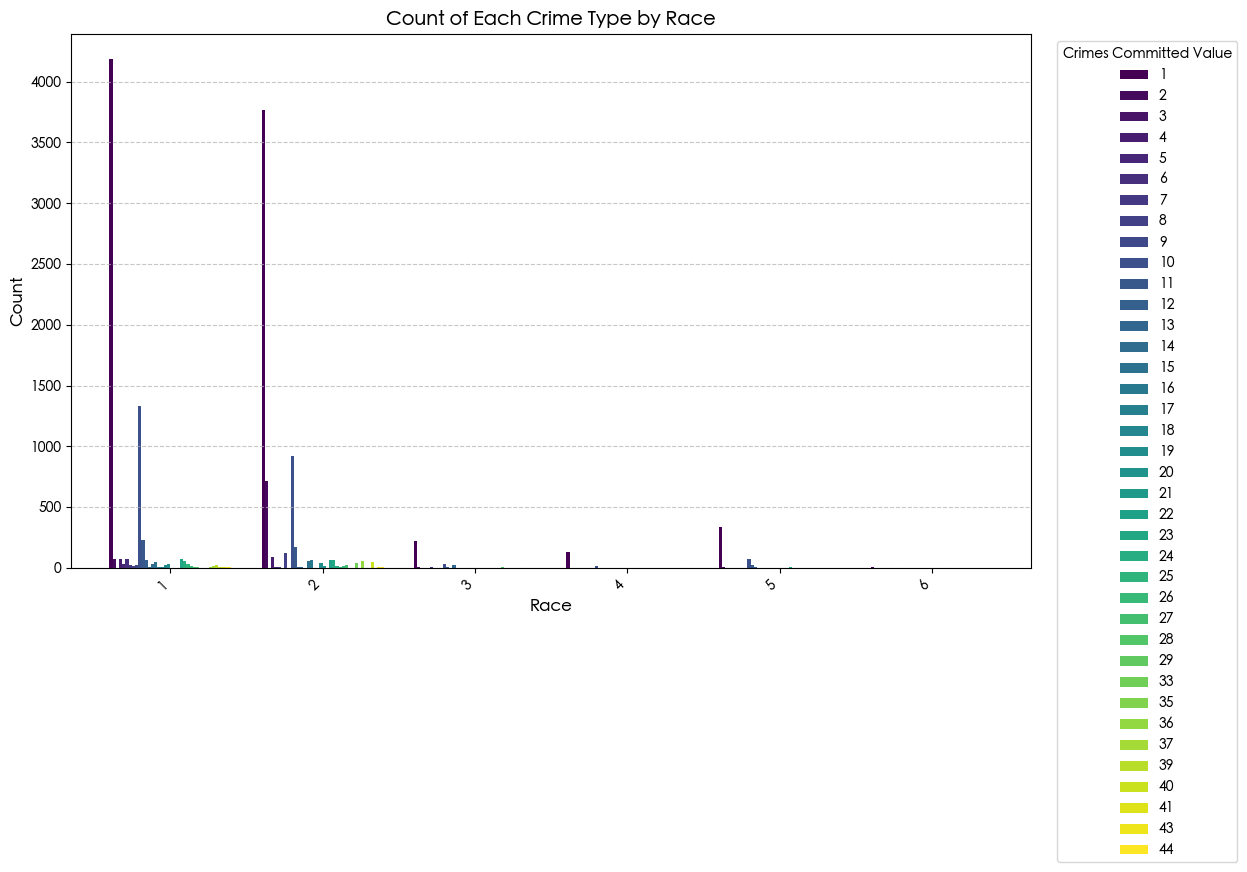

In [40]:


# 创建Race和Crimes Committed的交叉表
race_crime_crosstab = pd.crosstab(df['Race'], df['Crimes Committed'])

# 绘制分组条形图
fig, ax = plt.subplots(figsize=(14, 8)) # 调整图像大小以便更清晰地显示
race_crime_crosstab.plot(kind='bar', ax=ax, colormap='viridis', width=0.8) # 使用 'viridis' colormap，可调整条形宽度

# 添加数值标签到每个条形上 (可选, 如果条形过多可能会显得拥挤)
# for container in ax.containers:
#     ax.bar_label(container, label_type='edge', fontsize=8, padding=3)

ax.set_xlabel('Race', fontweight='bold', fontsize=12)
ax.set_ylabel('Count', fontweight='bold', fontsize=12)
ax.set_title('Count of Each Crime Type by Race', fontweight='bold', fontsize=14)

# 获取X轴的标签（Race的值）
race_labels = race_crime_crosstab.index.tolist()
ax.set_xticklabels(race_labels, rotation=45, ha='right')

ax.legend(title='Crimes Committed Value', bbox_to_anchor=(1.02, 1), loc='upper left') # 将图例放置在图表外部
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.9, 1]) # 调整布局为图例腾出空间
plt.savefig('../visualize/race_vs_each_crime_type_counts_barchart.png', dpi=600)
plt.show()

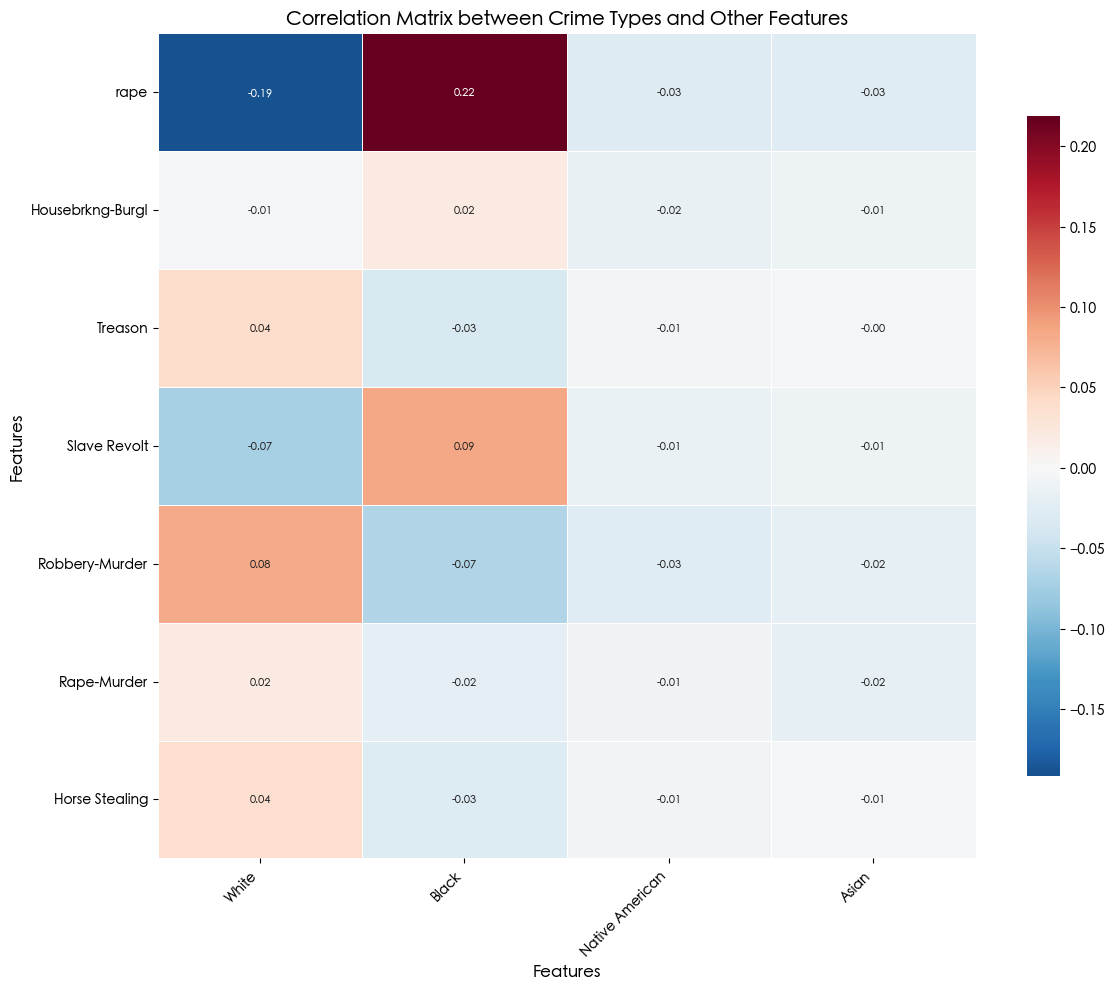

In [66]:
# 创建数值特征的相关性热力图（美化版）
plt.figure(figsize=(12, 10))

# 定义两组列
crime_columns = ['rape', 'Housebrkng-Burgl', 'Treason', 'Slave Revolt', 'Robbery-Murder', 'Rape-Murder', 'Horse Stealing']
other_features = ['White', 'Black', 'Native American', 'Asian']

# 确保所有选择的列都存在于DataFrame中
# (您可以添加错误检查来确认这些列确实在 df 中)
selected_columns = crime_columns + other_features
subset_df = df[selected_columns]

# 创建相关性矩阵
correlation_matrix = subset_df.corr(method='spearman')
correlation_matrix = correlation_matrix.loc[crime_columns, other_features]
# 创建mask用于只显示下三角 (可选，如果您想看完整的矩阵可以移除)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 设置阈值，突出显示高相关性
high_corr_threshold = 0.3
abs_corr = np.abs(correlation_matrix)

# 绘制热力图
ax = sns.heatmap(correlation_matrix,
                # mask=mask, # 如果您想看完整的矩阵，请注释掉这一行
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=False, # 设置为False以适应可能非方形的矩阵
                linewidths=.5,
                cbar_kws={"shrink": .8},
                fmt='.2f', # 调整小数位数以便更好地显示
                annot_kws={'size': 8}) # 调整注释字体大小


plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix between Crime Types and Other Features', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.savefig('../visualize/correlation_heatmap_crime_vs_features.png', dpi=600, bbox_inches='tight')
plt.show()


In [69]:
df_sla = df[df['Crimes Committed'] == 8].copy()
df_sla[df_sla['Slave Revolt'] == df_sla['Black']]

,Race,Execution Method,State,Sex,Year,Month,Day,Crimes Committed,Date,murder,...,Housebrkng-Burgl,Treason,Slave Revolt,Robbery-Murder,Rape-Murder,Horse Stealing,White,Black,Native American,Asian
1578,2,1,1,1,1860,10,19,8,1860-10-19,0,...,0,0,1,0,0,0,0,1,0,0
1579,2,1,1,1,1860,10,19,8,1860-10-19,0,...,0,0,1,0,0,0,0,1,0,0
1580,2,1,1,1,1860,10,19,8,1860-10-19,0,...,0,0,1,0,0,0,0,1,0,0
3869,2,1,13,1,1819,5,17,8,1819-05-17,0,...,0,0,1,0,0,0,0,1,0,0
5298,2,1,21,1,1848,10,28,8,1848-10-28,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
12431,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
12432,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
12433,2,1,51,1,1831,9,23,8,1831-09-23,0,...,0,0,1,0,0,0,0,1,0,0
